## 1. Read in the previous business CSV you wrote at the end of project 3 (when you
## used summary statistics.)

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pylab as plt


from collections import Counter
%matplotlib inline

file = "las_vegas_business.csv"
las_vegas_bussiness_df = pd.read_csv(file)
las_vegas_bussiness_df.shape

(29285, 12)

## 2. Create a bar chart of the frequency of the top 20 business categories.
## a. These are comma-separated items in a character string so you’ll have to
## split them before being able to count them.
## b. Do this per business.
## c. Repeat this but ranking them according to the total amount of reviews for
## each.
## d. What similarities and differences do you see between these two plots?

In [2]:
# making categories column workable - removing unnecessary chars
las_vegas_bussiness_df['categories'] = las_vegas_bussiness_df['categories'].str.replace('[','')
 
las_vegas_bussiness_df['categories'] = las_vegas_bussiness_df['categories'].str.replace(']','')
las_vegas_bussiness_df['categories'] = las_vegas_bussiness_df['categories'].str.replace("'",'')
las_vegas_bussiness_df['categories'] = las_vegas_bussiness_df['categories'].str.replace('"','')
las_vegas_bussiness_df['categories'] =las_vegas_bussiness_df['categories'].str.strip()


In [3]:
# Preparing stats By ReviewCount, stats By Business Count
i=0;
statsByReviewCount = {}
statsByBusCount = {}
for row in las_vegas_bussiness_df.itertuples():
    commaSepValuesList=row.categories.split(",")
    for j in range(len(commaSepValuesList)):
        category=commaSepValuesList[j]
        category=category.strip()
       
        if category in statsByReviewCount:
            statsByReviewCount[category] += int(row.review_count)
        else:
            statsByReviewCount[category] = int(row.review_count)
            
        if category in statsByBusCount:
            statsByBusCount[category] += 1
        else:
            statsByBusCount[category] = 1

print("done")

done


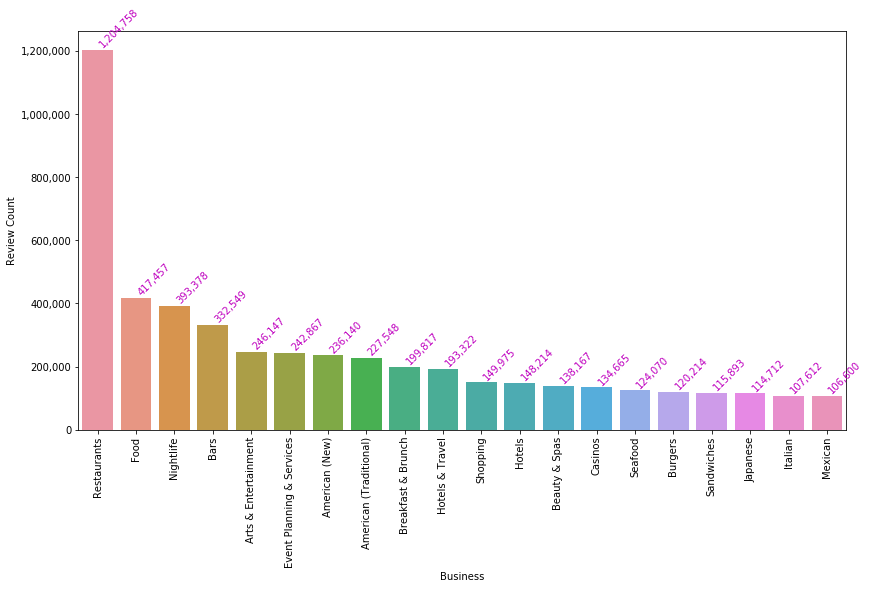

In [4]:
## GRAPH -1 - stats By Review Count
statsByReviewCount
s = pd.Series(statsByReviewCount, name='DateValue')

T1df = s.to_frame(name="cnt")
T1df['Business'] = T1df.index
T1df
T2df=T1df.groupby('Business', as_index=False).agg({"cnt": "sum" })
T3df=T2df.sort_values('cnt', ascending=False)
T3df
statsByReviewCount=T3df.drop_duplicates(subset='Business', keep="first")

statsByReviewCount=statsByReviewCount.sort_values('cnt', ascending=False).head(20)
statsByReviewCount
statsByReviewCount = statsByReviewCount.rename(columns={'cnt': 'Count'})
statsByReviewCount

plt.figure(figsize=(12,8))
ax = sns.barplot(statsByReviewCount['Business'],statsByReviewCount['Count'])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Business", ylabel='Review Count')
ax.set_xticklabels(statsByReviewCount.Business)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(statsByReviewCount["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

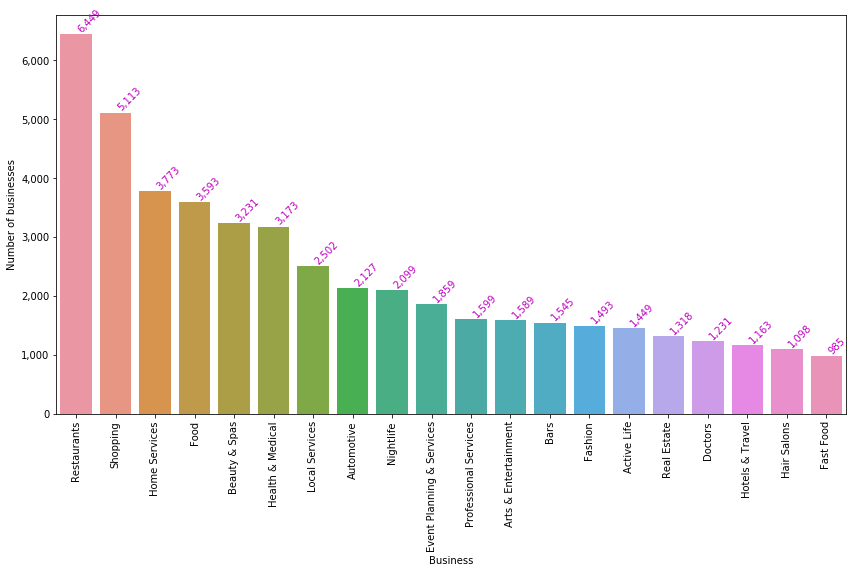

In [5]:
## GRAPH -2 - stats By Business Count
statsByBusCount
s = pd.Series(statsByBusCount, name='DateValue')

T1df = s.to_frame(name="cnt")
T1df['Business'] = T1df.index
T1df
T2df=T1df.groupby('Business', as_index=False).agg({"cnt": "sum" })
T3df=T2df.sort_values('cnt', ascending=False)
T3df
statsByBusCount=T3df.drop_duplicates(subset='Business', keep="first")

statsByBusCount=statsByBusCount.sort_values('cnt', ascending=False).head(20)
statsByBusCount
statsByBusCount = statsByBusCount.rename(columns={'cnt': 'Count'})
statsByBusCount

plt.figure(figsize=(12,8))
ax = sns.barplot(statsByBusCount['Business'],statsByBusCount['Count'])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Business", ylabel='Number of businesses')
ax.set_xticklabels(statsByBusCount.Business)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(statsByBusCount["Count"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

### 3. For the most common business category (note: is this by business or by reviews,
### or is that the same category?) plot the histogram of ‘stars’
### a. Do this first per business.
### b. Repeat this step, this time weighting by the number of reviews.
### c. What similarities and differences do you observe between the histograms?
### d. What is the most common star rating?

In [8]:
# Most common category is - "Restaurants"
restaurantsDF=las_vegas_bussiness_df[las_vegas_bussiness_df['categories'].str.contains("Restaurants")]
restaurantsDF.shape

(6449, 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259DD4A2B70>]],
      dtype=object)

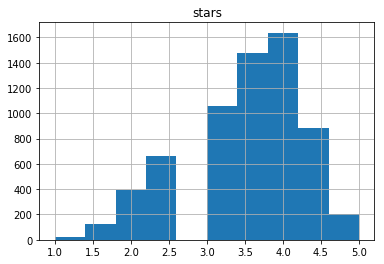

In [9]:
restaurantsDF.hist(column="stars")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259DD4D0DA0>]],
      dtype=object)

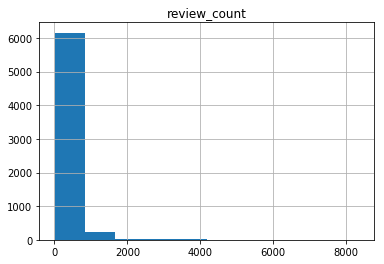

In [10]:
restaurantsDF.hist(column="review_count")

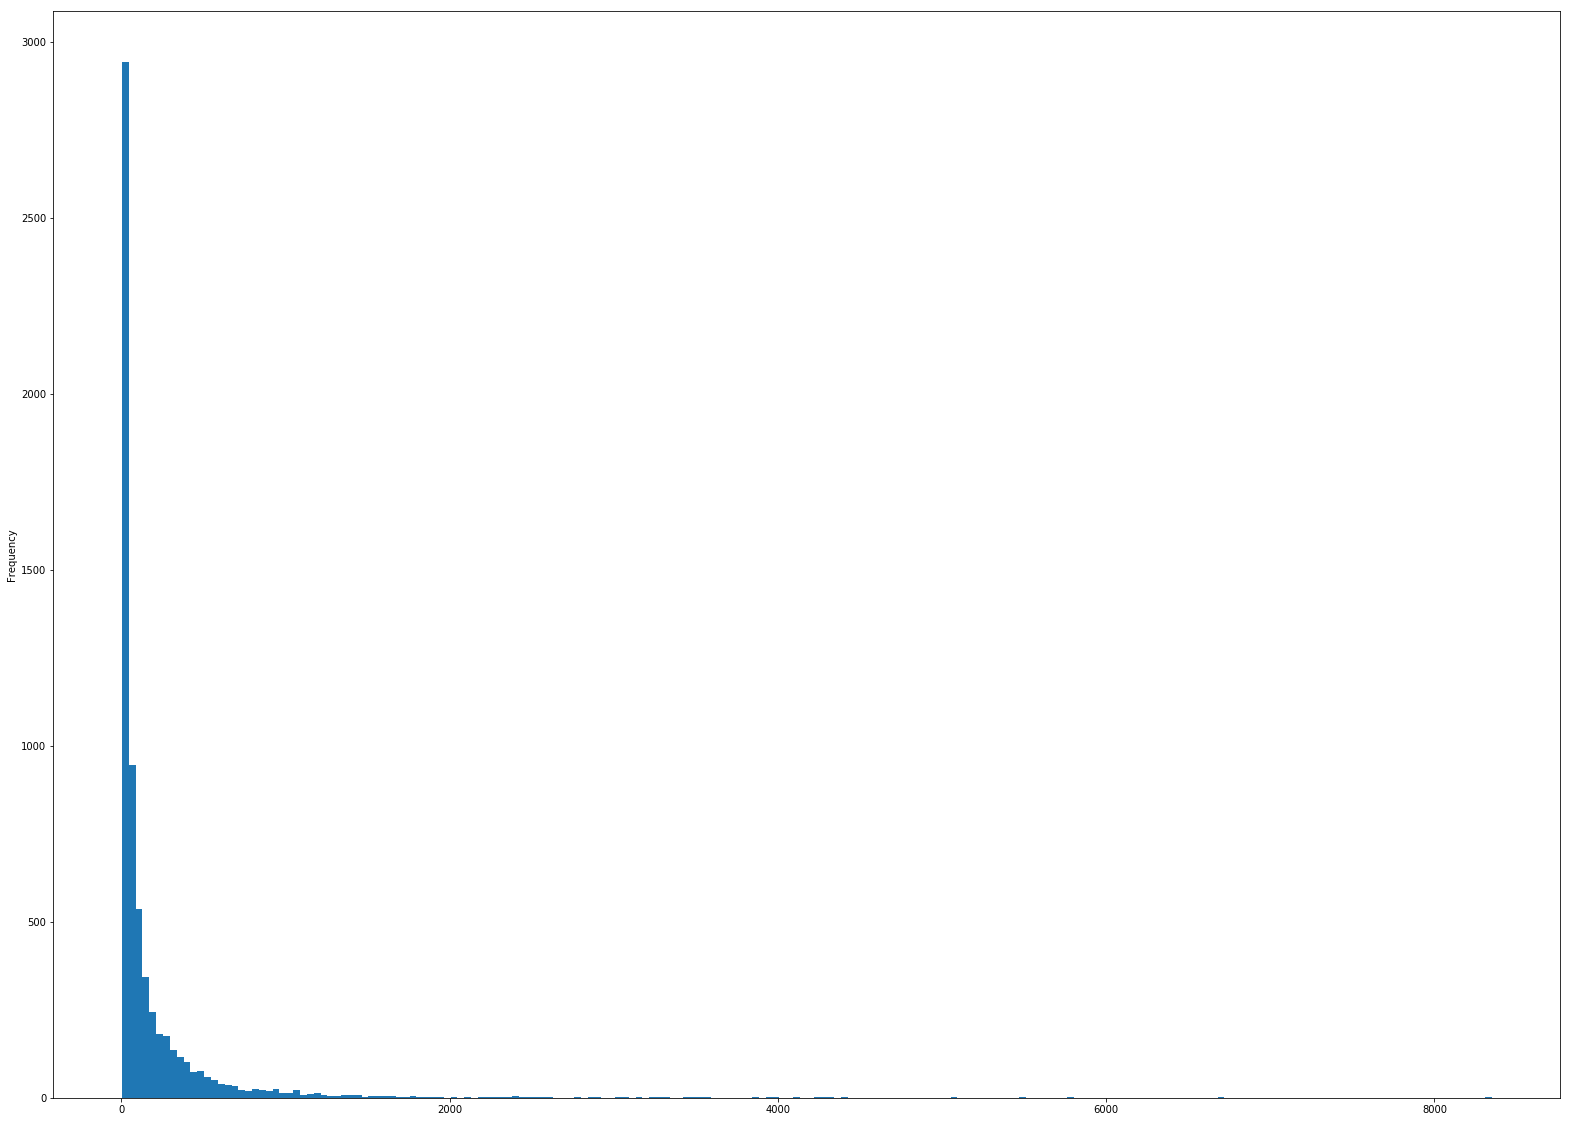

In [11]:
fig=plt.figure(figsize=(27,20))
restaurantsDF['review_count'].plot(kind='hist',bins=200)
plt.show()

### 4. Explore the relationship between the overall star rating of each business and the
### number of reviews it’s received by creating a scatterplot.
### a. Put ‘stars’ on the x-axis and review_count on the y-axis.
### b. Why do you think this makes most sense in this context?
### c. You may want to experiment with a value for alpha to reveal detail in the
### scatterplot.
### d. Do you see, or suspect, any relationships between the number of reviews
### and the star rating?

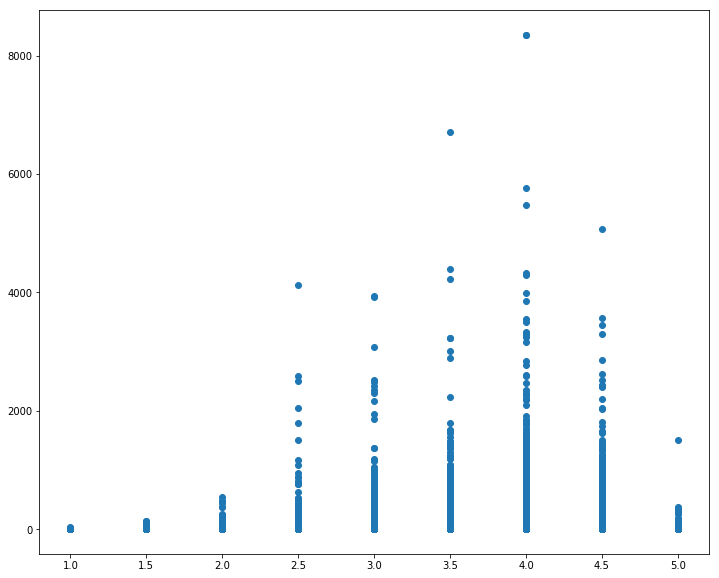

In [12]:
fig=plt.figure(figsize=(12,10))
plt.scatter(restaurantsDF.stars,restaurantsDF.review_count)

### 5. The density of points above does make it difficult to tell what’s going on, so to
### clarify your understanding, create a line plot of the mean and median number of
### reviews for each level of ‘star’.
### a. Plot the two lines on same graph, colored by the statistic type.
### b. Include a legend on the plot.
### c. Does this clarify any trends you saw before? Comment.

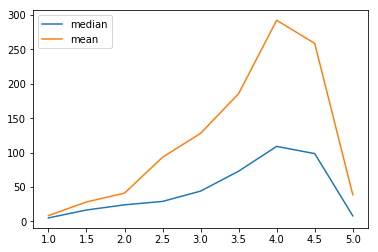

In [13]:
medianRevCountDF=restaurantsDF.groupby('stars', as_index=False).agg({"review_count": "median" })
meanRevCountDF=restaurantsDF.groupby('stars', as_index=False).agg({"review_count": "mean" })
plt.show()

plt.plot(medianRevCountDF['stars'], medianRevCountDF['review_count'],label="median")
plt.plot(meanRevCountDF['stars'], meanRevCountDF['review_count'], label="mean")
plt.legend(loc='best')
plt.show()

### 6. Create a plot, or plots, to visualize whether a restaurant is more likely to still be
### open if it has had more reviews.
### a. Comment on what you see.
### b. What caveats might be associated with your answer?

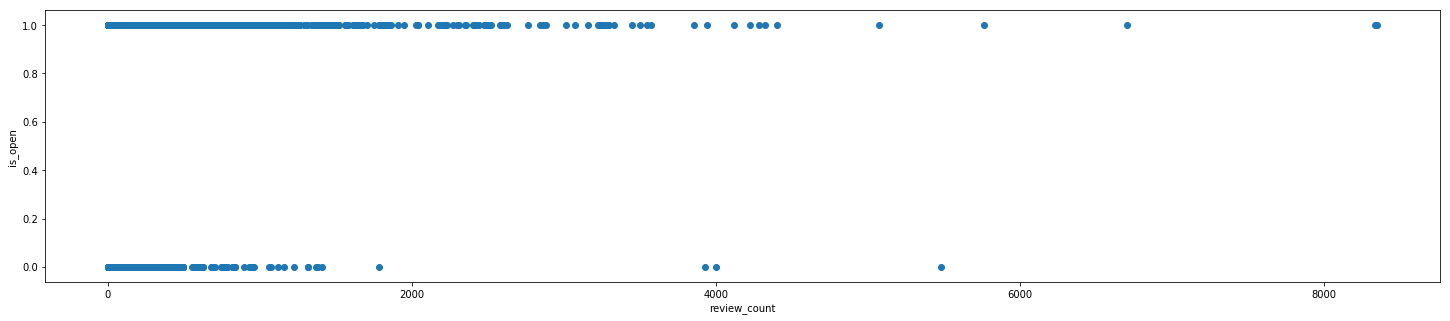

In [14]:
fig=plt.figure(figsize=(25,5))
#plt.scatter( restDF['review_count'],restDF['is_open'])
plt.scatter( restaurantsDF['review_count'],restaurantsDF['is_open'])
plt.xlabel("review_count")
plt.ylabel("is_open")
plt.show()

### 7. From the above, we may suspect now that a business may be more likely to stay
### open if it can get more reviews, but we really need to look at the history of its
### reviews, which are in the large review.json file.
### a. Create a list of the business IDs you want to read in.
### b. Define a reader to read the review data in chunks (a suggested size may
### be 100000 on your computer.)
### c. Use this reader to iteratively read in the file, filtering to keep just the
### business IDs you want and exclude the column of review texts.
### d. Concatentate the result into a single pandas DataFrame.
### e. Rename the ‘stars’ column to ‘review_rating’ to prevent later confusion.

In [15]:
from datetime import datetime

import json
fileName="C:/DS/Yelp/5_13/review.json"
t1=datetime.now()
num=sum(1 for line in open(fileName, encoding="utf-8"))

reviews=[]

with open(fileName,"r",encoding="utf-8" ) as f:
     for i in range(num):
        reviews.append(json.loads(next(f).strip()))
print("Loaded", len(reviews), " reviews in ", datetime.now() - t1 )

print(reviews[0])

Loaded 6685900  reviews in  0:03:30.907272
{'review_id': 'Q1sbwvVQXV2734tPgoKj4Q', 'user_id': 'hG7b0MtEbXx5QzbzE6C_VA', 'business_id': 'ujmEBvifdJM6h6RLv4wQIg', 'stars': 1.0, 'useful': 6, 'funny': 1, 'cool': 0, 'text': 'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.', 'date': '2013-05-07 04:34:36'}


In [16]:
reviewsDF = pd.DataFrame(reviews)   
reviewsDF.shape

(6685900, 9)

In [17]:
# Filtering the big reviews dataframe & just keeping the reviews for 'Restaurents'
busIdForRestaurentsList=restaurantsDF['business_id'].tolist()
busIdForRestaurentsList
rsataurentsReviewsDF = reviewsDF[reviewsDF['business_id'].isin(busIdForRestaurentsList)]

rsataurentsReviewsDF = rsataurentsReviewsDF.rename(columns={'stars': 'review_rating'})
del rsataurentsReviewsDF['text']
rsataurentsReviewsDF.shape

(1242697, 8)

### 8. Add a new column called ‘first_date’ that is the earliest date seen for each
###  business.
### a. You may want to think about how you’d create this as a summary statistic
### for each business and then merge it back into the full review DataFrame.

In [18]:
reviewsDF2=rsataurentsReviewsDF.groupby('business_id', as_index=False).agg({'date': np.min })

In [19]:
reviewsDF2

reviewsDF2 = reviewsDF2.rename(columns={'date': 'first_date'})
reviewsDF2.head(2)

#restDFwithDate=pd.merge(restaurantsDF, reviewsDF2.rename(columns={'mindate':'first_date'}), on='business_id',  how='left')


,business_id,first_date
0,--9e1ONYQuAa-CB_Rrw7Tw,2005-04-27 23:38:49
1,--q7kSBRb0vWC8lSkXFByA,2008-04-17 17:34:39


In [20]:
restaurantsDF.columns

Index(['address', 'attributes', 'business_id', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars'],
      dtype='object')

In [21]:
reviewsDF2.columns

Index(['business_id', 'first_date'], dtype='object')

In [22]:
restDFwithFirstDate=pd.merge(restaurantsDF, reviewsDF2, on='business_id',  how='left')
restDFwithFirstDate.columns

Index(['address', 'attributes', 'business_id', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'first_date'],
      dtype='object')

In [23]:
rsataurentsReviewsDF.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id'],
      dtype='object')

In [24]:
reviewsDFWithMinDate=pd.merge(rsataurentsReviewsDF, restDFwithFirstDate, on='business_id',  how='left')
reviewsDFWithMinDate.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id', 'address', 'attributes', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'first_date'],
      dtype='object')

In [25]:
reviewsDFWithMinDate.head(4)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,categories,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date
0,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4.0,0,FIk4lQQu1eTe2EpzQ4xhBA,1610 E Tropicana Ave,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Performing Arts, Amusement Parks, Museums, Arc...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.101449,-115.130511,Pinball Hall Of Fame,89119.0,1258,4.5,2006-10-11 04:05:21
1,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4.0,0,3CJUJILq7CLHk_9OrvpvQg,3790 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Delis, Sandwiches, Pizza, Restaurants","{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",1,36.102379,-115.174547,Greenberg's Deli,89136.0,333,4.0,2007-06-01 04:50:28
2,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5.0,0,2mxBNBeFrgDszqGS5tdEHA,3950 S Las Vegas Blvd,"{'WiFi': ""u'free'"", 'RestaurantsTakeOut': 'Tru...","Breakfast & Brunch, Restaurants, Tapas/Small P...","{'Monday': '10:0-22:0', 'Tuesday': '11:0-22:0'...",1,36.090067,-115.176973,Border Grill,89119.0,1623,4.0,2006-06-30 22:08:10
3,Sfc8Haz2Yri8Mo1L0E0TsA,0,2012-11-06 03:41:43,0,D_UvaenM25iNd6aehTZ0MA,5.0,0,8NwU4TRsD3S6gIfBqFzDMQ,6530 S Decatur Blvd,"{'Ambience': ""{'romantic': False, 'intimate': ...","Chicken Wings, Burgers, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0,36.071196,-115.207463,Chicken Bonz,89118.0,52,3.0,2010-05-12 14:58:16


### 9. Create a new column called ‘days’ for the number of days elapsed for each review
### since the first one (you may find astype(timedelta64… useful for this.)

In [26]:
reviewsDFWithMinDate["date"] = pd.to_datetime(reviewsDFWithMinDate["date"])
reviewsDFWithMinDate["first_date"] = pd.to_datetime(reviewsDFWithMinDate["first_date"])



reviewsDFWithMinDate["days"] = (reviewsDFWithMinDate["date"] - reviewsDFWithMinDate["first_date"])/np.timedelta64(1, 'D')
reviewsDFWithMinDate.head(3)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date,days
0,8mIrX_LrOnAqWsB5JrOojQ,0,2011-11-30 02:11:15,0,kbtscdyz6lvrtGjD1quQTg,4.0,0,FIk4lQQu1eTe2EpzQ4xhBA,1610 E Tropicana Ave,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",...,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,36.101449,-115.130511,Pinball Hall Of Fame,89119.0,1258,4.5,2006-10-11 04:05:21,1875.920764
1,I4Nr-MVc26qWr08-S3Q1ow,0,2016-01-17 05:26:22,0,IByf6mVY0WA838XNSh-5MA,4.0,0,3CJUJILq7CLHk_9OrvpvQg,3790 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...",...,"{'Monday': '9:0-22:0', 'Tuesday': '9:0-22:0', ...",1,36.102379,-115.174547,Greenberg's Deli,89136.0,333,4.0,2007-06-01 04:50:28,3152.024931
2,d_L-rfS1vT3JMzgCUGtiow,0,2016-07-25 03:57:19,0,S337tATeouQJdoPYyir29w,5.0,0,2mxBNBeFrgDszqGS5tdEHA,3950 S Las Vegas Blvd,"{'WiFi': ""u'free'"", 'RestaurantsTakeOut': 'Tru...",...,"{'Monday': '10:0-22:0', 'Tuesday': '11:0-22:0'...",1,36.090067,-115.176973,Border Grill,89119.0,1623,4.0,2006-06-30 22:08:10,3677.242465


### 10. Add a new column ‘cum_stars’ for the cumulative sum of stars gained by each
### business over time.

In [27]:
reviewsDFWithMinDate.sort_values(['business_id', 'date'], ascending=[True, True], inplace=True)
reviewsDFWithMinDate.head(10)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date,days
995430,--9e1ONYQuAa-CB_Rrw7Tw,1,2005-04-27 23:38:49,0,lgpSS6UsKYIvnQaw8JwHlQ,5.0,0,G5LXEaxhQMF_BVjNHkVr7g,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,0.000000
1001527,--9e1ONYQuAa-CB_Rrw7Tw,1,2006-01-07 08:36:58,0,B45SjrSgVXDw2EPlFCsBoQ,5.0,0,ospduHDy9IPFYD1UBwaJIw,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,254.373715
1017940,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-01-20 23:22:13,1,rIwd3sRWVrN7d0vxdiLeYA,5.0,1,_fNV13zb5M6GY6uBWb2etQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,267.988472
1021590,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-03-07 09:53:59,0,aQQIcQfFYawLYU85oGRxhQ,5.0,1,mytkOxFAZst4F0_WtsHp-A,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,313.427199
1002838,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-03-23 00:23:30,1,-7O72HqM4eJF0NMCgdLjCQ,5.0,1,quQ657_JzIKLeIYFeA-mwQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,329.031030
998667,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-05-27 18:13:51,0,Y9mls1kWNRsHYURCtl2Dtw,4.0,0,JMFDS0M8Hmpc-AYXNQULcw,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,394.774329
1010267,--9e1ONYQuAa-CB_Rrw7Tw,1,2006-07-15 16:49:37,0,d3-sC4eUvIdDzz6KgvCMXg,4.0,2,R0KVWeN9xR-F6j4z5k9wXQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,443.715833
1014924,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-07-27 06:54:59,0,y3EBG-1zykvZblLdSq_k9g,4.0,2,ChKHMb5xCCjO99vac3MhnQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,455.302894
1020230,--9e1ONYQuAa-CB_Rrw7Tw,4,2006-09-14 07:16:09,4,bHMxqjTDchcYo8pqwrUYqQ,4.0,5,S765x0O9aI2e1ISaB-NYfQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,504.317593
1011625,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-09-19 20:25:54,0,8Lkdb_TyJDn8knJX0hic0w,4.0,1,XL805HGrepwIPX5Rg9cPng,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,509.866030


In [28]:
reviewsDFWithMinDate['cum_stars'] = reviewsDFWithMinDate.groupby(['business_id'])['review_rating'].apply(lambda x: x.cumsum())
reviewsDFWithMinDate.head(10)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date,days,cum_stars
995430,--9e1ONYQuAa-CB_Rrw7Tw,1,2005-04-27 23:38:49,0,lgpSS6UsKYIvnQaw8JwHlQ,5.0,0,G5LXEaxhQMF_BVjNHkVr7g,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,0.000000,5.0
1001527,--9e1ONYQuAa-CB_Rrw7Tw,1,2006-01-07 08:36:58,0,B45SjrSgVXDw2EPlFCsBoQ,5.0,0,ospduHDy9IPFYD1UBwaJIw,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,254.373715,10.0
1017940,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-01-20 23:22:13,1,rIwd3sRWVrN7d0vxdiLeYA,5.0,1,_fNV13zb5M6GY6uBWb2etQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,267.988472,15.0
1021590,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-03-07 09:53:59,0,aQQIcQfFYawLYU85oGRxhQ,5.0,1,mytkOxFAZst4F0_WtsHp-A,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,313.427199,20.0
1002838,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-03-23 00:23:30,1,-7O72HqM4eJF0NMCgdLjCQ,5.0,1,quQ657_JzIKLeIYFeA-mwQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,329.031030,25.0
998667,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-05-27 18:13:51,0,Y9mls1kWNRsHYURCtl2Dtw,4.0,0,JMFDS0M8Hmpc-AYXNQULcw,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,394.774329,29.0
1010267,--9e1ONYQuAa-CB_Rrw7Tw,1,2006-07-15 16:49:37,0,d3-sC4eUvIdDzz6KgvCMXg,4.0,2,R0KVWeN9xR-F6j4z5k9wXQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,443.715833,33.0
1014924,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-07-27 06:54:59,0,y3EBG-1zykvZblLdSq_k9g,4.0,2,ChKHMb5xCCjO99vac3MhnQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,455.302894,37.0
1020230,--9e1ONYQuAa-CB_Rrw7Tw,4,2006-09-14 07:16:09,4,bHMxqjTDchcYo8pqwrUYqQ,4.0,5,S765x0O9aI2e1ISaB-NYfQ,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,504.317593,41.0
1011625,--9e1ONYQuAa-CB_Rrw7Tw,0,2006-09-19 20:25:54,0,8Lkdb_TyJDn8knJX0hic0w,4.0,1,XL805HGrepwIPX5Rg9cPng,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.16919,Delmonico Steakhouse,89109.0,1613,4.0,2005-04-27 23:38:49,509.866030,45.0


### 11. Add a new column ‘review_count’ for the review number (in date order) for each
### business.
### a. You may want to print a couple of test business ID reviews to check that
### you’ve calculated review_count correctly and it increases monotonically
### for each business and resets between businesses.

In [29]:
reviewsDFWithMinDate['review_count'] = reviewsDFWithMinDate.groupby(['business_id']).cumcount() + 1

reviewsDFWithMinDate.tail(6)


,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date,days,cum_stars
793169,zzzaIBwimxVej4tY6qFOUQ,0,2014-03-21 02:58:55,0,EuhdRxu-wG5KlBhI4w2g4Q,4.0,2,QvLg2kxqHHahxxOlHlEIZw,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,32,3.5,2012-10-11 16:08:09,525.451921,106.0
793356,zzzaIBwimxVej4tY6qFOUQ,0,2014-03-22 05:58:22,0,g2MEEq_cPUSwXtBMBAhaFA,3.0,0,vwLV4TkRMoghs86tB1Ke8Q,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,33,3.5,2012-10-11 16:08:09,526.576539,109.0
836148,zzzaIBwimxVej4tY6qFOUQ,0,2014-04-16 18:20:11,0,9ziCn1IXKTAIYmxr4BOLSg,5.0,2,B5BOIZ6o0RHQgUmWNvXVvw,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,34,3.5,2012-10-11 16:08:09,552.091690,114.0
805571,zzzaIBwimxVej4tY6qFOUQ,0,2014-05-03 04:07:07,0,iQnVA7sd5xRG93N2VqcKYQ,2.0,1,Du9u6dXgWYubbnZuor1KqQ,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,35,3.5,2012-10-11 16:08:09,568.499282,116.0
793503,zzzaIBwimxVej4tY6qFOUQ,0,2014-05-18 15:55:17,0,3DCaLLp_d7EFUBMyfbe3bw,5.0,0,sxEjivCOzY3tVcvVWA0EvQ,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,36,3.5,2012-10-11 16:08:09,583.991065,121.0
736279,zzzaIBwimxVej4tY6qFOUQ,0,2014-07-14 01:08:00,0,-nPkTPtx2xMSiYBz8XrPKw,5.0,0,1YJsClt42snoxI_kSrlfkQ,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,37,3.5,2012-10-11 16:08:09,640.374896,126.0


In [30]:
reviewsDFWithMinDate.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id', 'address', 'attributes', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'first_date', 'days', 'cum_stars'],
      dtype='object')

In [31]:

reviewsDFWithMinDate.tail(40)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_count,stars,first_date,days,cum_stars
1095134,zx_j6OuuHHa2afVoAZuLpA,0,2018-10-28 01:38:25,0,N88-gutIAkdJLXtp9oiCpg,3.0,0,vmkecvlmBN4LXAcXBB33MA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,76,4.5,2018-05-02 01:33:35,179.003356,352.0
1112781,zx_j6OuuHHa2afVoAZuLpA,0,2018-10-29 02:59:10,0,5x-MvEZ0AeCfjXPmDtuQKw,5.0,0,kv52XKRx933NkrOj5txKfA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,77,4.5,2018-05-02 01:33:35,180.059433,357.0
1100010,zx_j6OuuHHa2afVoAZuLpA,0,2018-11-08 10:20:08,0,NlCo1aAMP2AaE6QCdGYWRQ,5.0,0,qaR54XtzJGIGxnTEjisM-w,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,78,4.5,2018-05-02 01:33:35,190.365660,362.0
739766,zzzaIBwimxVej4tY6qFOUQ,0,2012-10-11 16:08:09,6,ThiCaZ61J5KgKEV8LF1XNg,3.0,5,eOIMO2wT_WbNqmavhnCRxw,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,1,3.5,2012-10-11 16:08:09,0.000000,3.0
769153,zzzaIBwimxVej4tY6qFOUQ,6,2012-11-16 03:18:51,3,SGaLMxS5g82SYbig_q42AA,4.0,13,S2tfbnjoCzMX0U0B_cTXVw,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,2,3.5,2012-10-11 16:08:09,35.465764,7.0
835327,zzzaIBwimxVej4tY6qFOUQ,0,2012-11-29 22:13:10,0,1WgXVPm4FuMQl07COCBtyw,4.0,4,jhaT21VWZVtW2zXPVmzeyg,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,3,3.5,2012-10-11 16:08:09,49.253484,11.0
833268,zzzaIBwimxVej4tY6qFOUQ,0,2012-12-01 21:13:14,0,HXN_Lo5hF9gqlFgaBdxkCg,1.0,2,R9Bm86DXed10xMvhJrcDdQ,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,4,3.5,2012-10-11 16:08:09,51.211863,12.0
756248,zzzaIBwimxVej4tY6qFOUQ,3,2012-12-07 20:12:43,2,YHLQ4T-QWT-cd0Pm2wMDGw,4.0,7,4A83_zUaPBUn5Nc7eeOgtA,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,5,3.5,2012-10-11 16:08:09,57.169838,16.0
833601,zzzaIBwimxVej4tY6qFOUQ,0,2012-12-24 02:19:28,0,iW5AiBrTtAGgXe3KqANItg,5.0,2,BP652XN-JNMhMWzNgZHSRg,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,6,3.5,2012-10-11 16:08:09,73.424525,21.0
811192,zzzaIBwimxVej4tY6qFOUQ,0,2013-01-01 19:15:11,0,6TPCKbxJ_7Ip1-sy3WLvvw,2.0,2,QqRSNjWhfUFv1ZU0OnYKZQ,6728 W Cheyenne Ave,"{'Caters': 'True', 'RestaurantsReservations': ...",...,0,36.218424,-115.243158,Guthrie's,89108.0,7,3.5,2012-10-11 16:08:09,82.129884,23.0


In [32]:
reviewsDFWithMinDate.rename(columns={'review_count': 'review_number'}, inplace=True)
reviewsDFWithMinDate.tail(50)

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_number,stars,first_date,days,cum_stars
1044393,zx_j6OuuHHa2afVoAZuLpA,0,2018-09-09 23:19:32,0,nl_rxHeYuFMxLFziI9ZOuA,5.0,0,A_59_p8jaY6TgXWMnpWrsw,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,66,4.5,2018-05-02 01:33:35,130.906910,308.0
1098700,zx_j6OuuHHa2afVoAZuLpA,1,2018-09-10 03:07:09,0,hvph333EnIjxFhzksKhqLg,4.0,0,wVNudUZi_OHajI-YeOGw0A,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,67,4.5,2018-05-02 01:33:35,131.064977,312.0
1107623,zx_j6OuuHHa2afVoAZuLpA,2,2018-09-10 05:11:20,1,m0yVFy48yzyHyx0YLy64Ig,4.0,1,OVYP73aNQaEKLf4w4_40SA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,68,4.5,2018-05-02 01:33:35,131.151215,316.0
1097359,zx_j6OuuHHa2afVoAZuLpA,2,2018-09-11 02:22:00,0,rPWCvhbtKCMjEuObmALNLQ,4.0,0,Dxg45fV8RbT7l6parLymQA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,69,4.5,2018-05-02 01:33:35,132.033623,320.0
1040249,zx_j6OuuHHa2afVoAZuLpA,2,2018-09-17 03:43:18,0,p85kLglRNsArBobYMgCh1A,5.0,0,d4iFEVUR5EcUzDcg2ox1vg,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,70,4.5,2018-05-02 01:33:35,138.090081,325.0
1070106,zx_j6OuuHHa2afVoAZuLpA,0,2018-09-19 02:23:45,0,x5RC389mhdvfOjWEw3FQhQ,5.0,0,aqeHj10KA-RX754ZRlrDUA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,71,4.5,2018-05-02 01:33:35,140.034838,330.0
1111927,zx_j6OuuHHa2afVoAZuLpA,1,2018-09-27 17:46:58,0,PWRwAre_Nd4kY1CwM5Xe2A,5.0,0,BrL-_hzh77zft7kCye_TLQ,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,72,4.5,2018-05-02 01:33:35,148.675961,335.0
1099627,zx_j6OuuHHa2afVoAZuLpA,1,2018-09-29 03:29:11,1,el1JKo0Me2SJRZCKlf9FDQ,4.0,0,MrYf4be049lKSa5AkWVnMw,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,73,4.5,2018-05-02 01:33:35,150.080278,339.0
1023070,zx_j6OuuHHa2afVoAZuLpA,0,2018-09-30 04:22:45,0,yL161i8Fav0FmMLCSMs83A,5.0,0,pLhYNnfGS9XPcXbj6-jotA,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,74,4.5,2018-05-02 01:33:35,151.117477,344.0
1098655,zx_j6OuuHHa2afVoAZuLpA,1,2018-10-01 07:30:43,0,laZoJm4jYOROzmpMukiAHw,5.0,0,gwgbEzT1iuX4_oUJG2JgDQ,"8665 W Flamingo Rd, Ste 106","{'RestaurantsAttire': ""'casual'"", 'HasTV': 'Fa...",...,1,36.114389,-115.281062,what's Crepe,89147.0,75,4.5,2018-05-02 01:33:35,152.248009,349.0


### 12. Add columns ‘is_open’ and ‘stars’ from your business DataFrame (joining on the
#### business_id.)

In [33]:
reviewsDFWithMinDate.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id', 'address', 'attributes', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_number', 'stars', 'first_date', 'days', 'cum_stars'],
      dtype='object')

In [34]:
reviewsDFWithMinDate.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id', 'address', 'attributes', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_number', 'stars', 'first_date', 'days', 'cum_stars'],
      dtype='object')

### 13. Now create a ‘snapshot’ picture for each business by keeping just the last review
### it had within its first 30 days. Because of the columns we added above, this now
### gives us a single entry for each business that should tell us, for example, how
### many stars in total it had gained within its first 30 days, how many reviews, what
### its final overall star rating was, and whether it was still open or not.

In [35]:
df2 = reviewsDFWithMinDate.copy()

In [36]:

df2 = df2[df2.days <= 30]
df2

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_number,stars,first_date,days,cum_stars
995430,--9e1ONYQuAa-CB_Rrw7Tw,1,2005-04-27 23:38:49,0,lgpSS6UsKYIvnQaw8JwHlQ,5.0,0,G5LXEaxhQMF_BVjNHkVr7g,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.169190,Delmonico Steakhouse,89109.0,1,4.0,2005-04-27 23:38:49,0.000000,5.0
351808,--q7kSBRb0vWC8lSkXFByA,0,2008-04-17 17:34:39,0,Nr2PWPdwfhhtZsI8HIHPrQ,5.0,2,yRpS19ckVDxkBFY_h1RxHA,9495 Las Vegas Blvd S,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,0,36.016693,-115.173115,Double Play Sports Bar,89123.0,1,4.0,2008-04-17 17:34:39,0.000000,5.0
215378,-0BxAGlIk5DJAGVkpqBXxg,1,2007-02-09 18:11:13,1,VrhvavCVZHhMebeRS1X-mQ,1.0,1,yRtajw-lGYoOXdOdfwV9hQ,3355 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",...,1,36.122935,-115.168528,The Coffee Bean & Tea Leaf,89162.0,1,3.0,2007-02-09 18:11:13,0.000000,1.0
673289,-0RkJ_uIduNLWQrphbADRw,1,2018-08-30 16:47:45,0,j3iYYcnLXg7tykymA1vUdA,5.0,1,kYKL1VvoI8bHjuOyq2_yUg,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,1,4.5,2018-08-30 16:47:45,0.000000,5.0
665601,-0RkJ_uIduNLWQrphbADRw,1,2018-09-08 19:51:59,0,doiHXuUT8oywsrseuxQVjg,5.0,0,QYlXUhx4L7K0In8g-2lELQ,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,2,4.5,2018-08-30 16:47:45,9.127940,10.0
656113,-0RkJ_uIduNLWQrphbADRw,1,2018-09-08 20:00:02,0,3rbbV9W1-zVLqQzAs-mu7g,5.0,1,9A2ltfAc26Dc4vtoo3lGFQ,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,3,4.5,2018-08-30 16:47:45,9.133530,15.0
711985,-0RkJ_uIduNLWQrphbADRw,1,2018-09-10 19:09:32,0,SVRnSFlM00x1d2jOtn2Gew,5.0,0,M_TD7t7quQX43NfyoKYFbg,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,4,4.5,2018-08-30 16:47:45,11.098461,20.0
672134,-0RkJ_uIduNLWQrphbADRw,1,2018-09-10 20:07:06,0,3lcEnqSxqhv153W5gDnOyQ,5.0,0,X8L4nrcK61SczCX6aysetw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,5,4.5,2018-08-30 16:47:45,11.138438,25.0
710520,-0RkJ_uIduNLWQrphbADRw,1,2018-09-11 03:14:20,0,cOEn2GYIm_o455yrGTZ0SQ,5.0,0,Edn24bgKW7RpX6NoVbC4zw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,6,4.5,2018-08-30 16:47:45,11.435127,30.0
713487,-0RkJ_uIduNLWQrphbADRw,1,2018-09-13 17:30:41,0,eUxxMd1Ptnfg3GNHYwDNBg,5.0,0,ijkU7mRmOTQ21VeuD_zTTw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,7,4.5,2018-08-30 16:47:45,14.029815,35.0


In [37]:
df2.shape

(36960, 22)

In [38]:
bus_review_30_day=df2.copy()
bus_review_30_day

,business_id,cool,date,funny,review_id,review_rating,useful,user_id,address,attributes,...,is_open,latitude,longitude,name,postal_code,review_number,stars,first_date,days,cum_stars
995430,--9e1ONYQuAa-CB_Rrw7Tw,1,2005-04-27 23:38:49,0,lgpSS6UsKYIvnQaw8JwHlQ,5.0,0,G5LXEaxhQMF_BVjNHkVr7g,3355 Las Vegas Blvd S,"{'WiFi': ""u'no'"", 'RestaurantsAttire': ""'dress...",...,1,36.123183,-115.169190,Delmonico Steakhouse,89109.0,1,4.0,2005-04-27 23:38:49,0.000000,5.0
351808,--q7kSBRb0vWC8lSkXFByA,0,2008-04-17 17:34:39,0,Nr2PWPdwfhhtZsI8HIHPrQ,5.0,2,yRpS19ckVDxkBFY_h1RxHA,9495 Las Vegas Blvd S,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...",...,0,36.016693,-115.173115,Double Play Sports Bar,89123.0,1,4.0,2008-04-17 17:34:39,0.000000,5.0
215378,-0BxAGlIk5DJAGVkpqBXxg,1,2007-02-09 18:11:13,1,VrhvavCVZHhMebeRS1X-mQ,1.0,1,yRtajw-lGYoOXdOdfwV9hQ,3355 Las Vegas Blvd S,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",...,1,36.122935,-115.168528,The Coffee Bean & Tea Leaf,89162.0,1,3.0,2007-02-09 18:11:13,0.000000,1.0
673289,-0RkJ_uIduNLWQrphbADRw,1,2018-08-30 16:47:45,0,j3iYYcnLXg7tykymA1vUdA,5.0,1,kYKL1VvoI8bHjuOyq2_yUg,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,1,4.5,2018-08-30 16:47:45,0.000000,5.0
665601,-0RkJ_uIduNLWQrphbADRw,1,2018-09-08 19:51:59,0,doiHXuUT8oywsrseuxQVjg,5.0,0,QYlXUhx4L7K0In8g-2lELQ,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,2,4.5,2018-08-30 16:47:45,9.127940,10.0
656113,-0RkJ_uIduNLWQrphbADRw,1,2018-09-08 20:00:02,0,3rbbV9W1-zVLqQzAs-mu7g,5.0,1,9A2ltfAc26Dc4vtoo3lGFQ,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,3,4.5,2018-08-30 16:47:45,9.133530,15.0
711985,-0RkJ_uIduNLWQrphbADRw,1,2018-09-10 19:09:32,0,SVRnSFlM00x1d2jOtn2Gew,5.0,0,M_TD7t7quQX43NfyoKYFbg,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,4,4.5,2018-08-30 16:47:45,11.098461,20.0
672134,-0RkJ_uIduNLWQrphbADRw,1,2018-09-10 20:07:06,0,3lcEnqSxqhv153W5gDnOyQ,5.0,0,X8L4nrcK61SczCX6aysetw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,5,4.5,2018-08-30 16:47:45,11.138438,25.0
710520,-0RkJ_uIduNLWQrphbADRw,1,2018-09-11 03:14:20,0,cOEn2GYIm_o455yrGTZ0SQ,5.0,0,Edn24bgKW7RpX6NoVbC4zw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,6,4.5,2018-08-30 16:47:45,11.435127,30.0
713487,-0RkJ_uIduNLWQrphbADRw,1,2018-09-13 17:30:41,0,eUxxMd1Ptnfg3GNHYwDNBg,5.0,0,ijkU7mRmOTQ21VeuD_zTTw,"2620 Regatta Dr, Ste 113","{'RestaurantsReservations': 'False', 'Restaura...",...,1,36.207539,-115.268154,Rooster Boy Cafe,89128.0,7,4.5,2018-08-30 16:47:45,14.029815,35.0


In [39]:
bus_review_30_day.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'review_rating',
       'useful', 'user_id', 'address', 'attributes', 'categories', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_number', 'stars', 'first_date', 'days', 'cum_stars'],
      dtype='object')

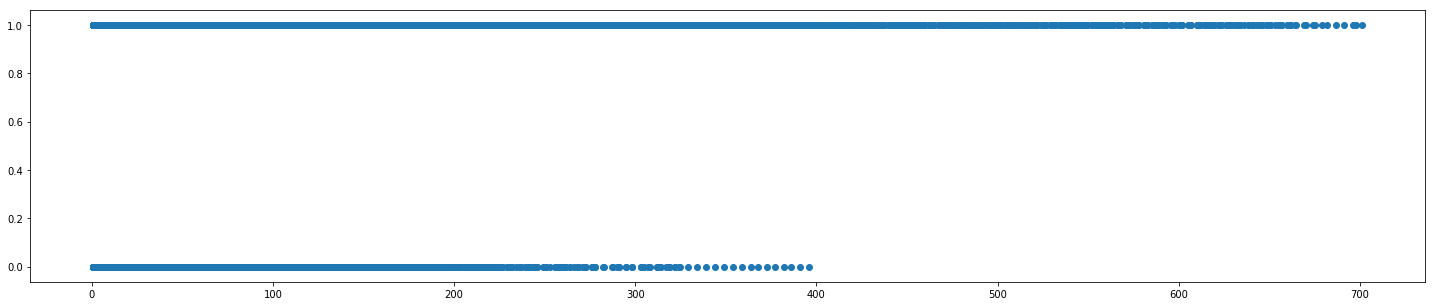

In [40]:
fig=plt.figure(figsize=(25,5))
#plt.scatter( restDF['review_count'],restDF['is_open'])
plt.scatter( bus_review_30_day['cum_stars'],bus_review_30_day['is_open'])

# Because of the columns we added above, this now
# gives us a single entry for each business that should tell us, for example, how
# many stars in total it had gained within its first 30 days, how many reviews, what
# its final overall star rating was, and whether it was still open or not.

In [41]:
snapshot=bus_review_30_day.groupby('business_id',as_index=False).agg({'review_number':['max'], 
                         'stars':'sum', 
                         'cum_stars': lambda x: x.max(),
                          'is_open': ['max']})

In [42]:
bus_review_30_day.shape

(36960, 22)

In [72]:
ssdf=bus_review_30_day.groupby('business_id',as_index=False).agg({'review_number':['max'],'stars':'sum','cum_stars':['max']})
ssdf.columns                                                                 



MultiIndex(levels=[['review_number', 'stars', 'cum_stars', 'business_id'], ['max', 'sum', '']],
           labels=[[3, 0, 1, 2], [2, 0, 1, 0]])

In [73]:
ssdf.columns = ssdf.columns.droplevel()

#ssdf.rename(columns = {"" : "business_id","max":"review_count","sum":"stars"}, inplace = True)
#ssdf.columns 

#ssdf.boxplot(ssdf['max'])
#ssdf.boxplot('review_count')

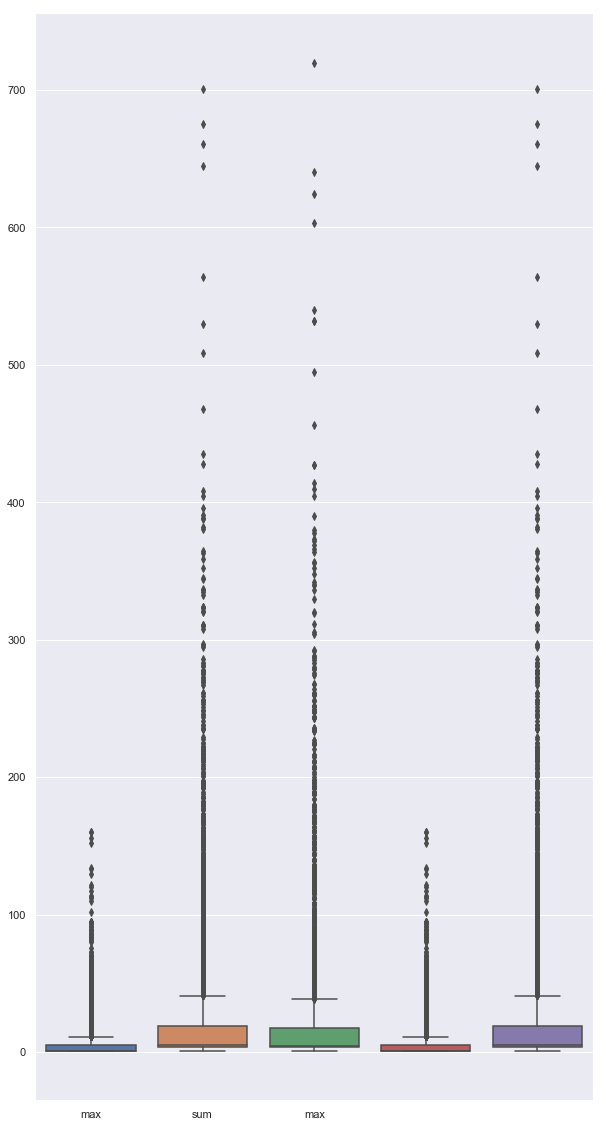

In [74]:
plt.figure(figsize=(10,20))
sns.boxplot(data = ssdf)

In [75]:
ssdf.shape

(6449, 4)

In [77]:
business_open_or_not=las_vegas_bussiness_df[['business_id','is_open']].copy()
business_open_or_not.shape

(29285, 2)

In [86]:
rsataurentsReviewsDF.columns
ssdf.columns
ssdf.rename(columns = {"" : "business_id","max":"review_count","sum":"stars","max":"cum_stars"}, inplace = True)
ssdf
ssdf.rename(columns={ ssdf.columns[1]: "review_count" })
ssdf.columns
ssdf.columns = ['business_id','review_count','stars','cum_stars']
ssdf.columns

Index(['business_id', 'review_count', 'stars', 'cum_stars'], dtype='object')

In [87]:
ssdf=pd.merge(ssdf, business_open_or_not, on='business_id',  how='left')
ssdf.columns

Index(['business_id', 'review_count', 'stars', 'cum_stars', 'is_open'], dtype='object')

In [88]:
ssdf.columns

Index(['business_id', 'review_count', 'stars', 'cum_stars', 'is_open'], dtype='object')

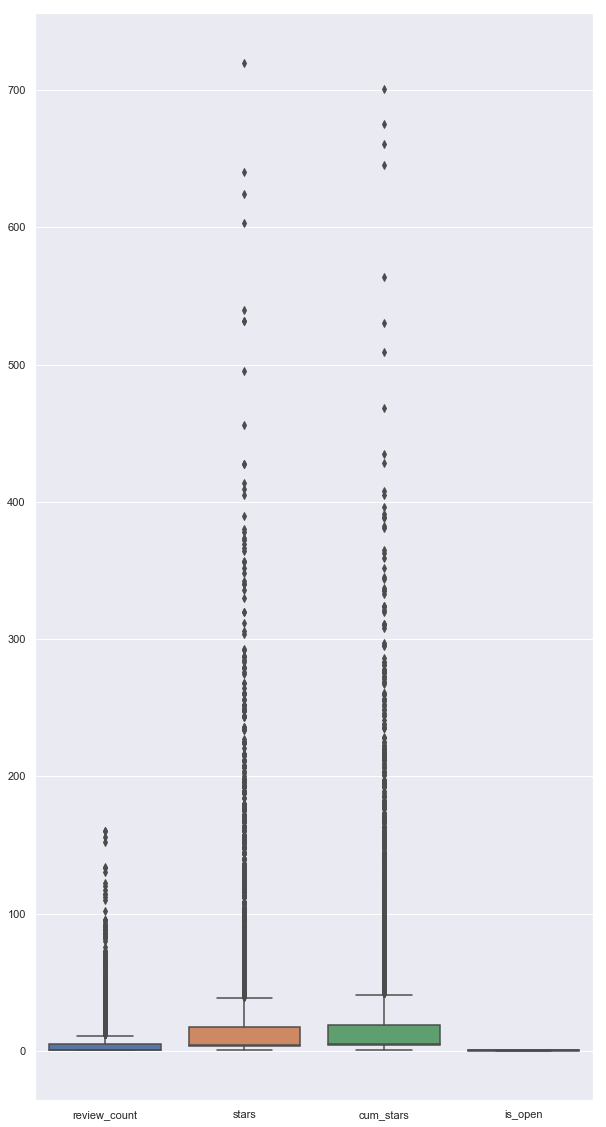

In [89]:
plt.figure(figsize=(10,20))
sns.boxplot(data = ssdf)

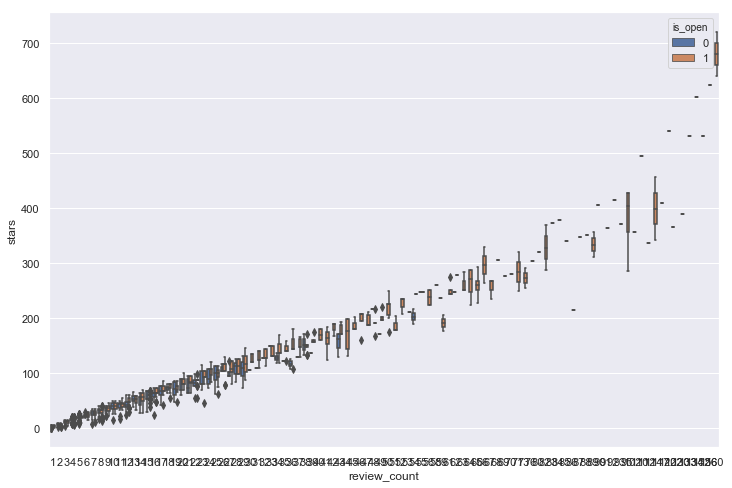

In [90]:
plt.figure(figsize=(12,8))
#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
#'business_id', 'review_count', 'stars', 'is_open'
ax = sns.boxplot(x="review_count", y="stars", hue="is_open", data=ssdf)
                 #, palette=sns.color_palette(('.5', 'g')))
plt.show()

In [91]:
ssdf

,business_id,review_count,stars,cum_stars,is_open
0,--9e1ONYQuAa-CB_Rrw7Tw,1,4.0,5.0,1
1,--q7kSBRb0vWC8lSkXFByA,1,4.0,5.0,0
2,-0BxAGlIk5DJAGVkpqBXxg,1,3.0,1.0,1
3,-0RkJ_uIduNLWQrphbADRw,18,81.0,86.0,1
4,-153AjTW5luZPK4omEujWA,1,3.0,3.0,0
5,-1m9o3vGRA8IBPNvNqKLmA,26,117.0,126.0,1
6,-1vfRrlnNnNJ5boOVghMPA,5,15.0,19.0,0
7,-3zffZUHoY8bQjGfPSoBKQ,3,12.0,10.0,1
8,-46pFijv3f2jZH-_Ze6CQA,3,12.0,10.0,1
9,-8R_-EkGpUhBk55K9Dd4mg,2,7.0,8.0,1


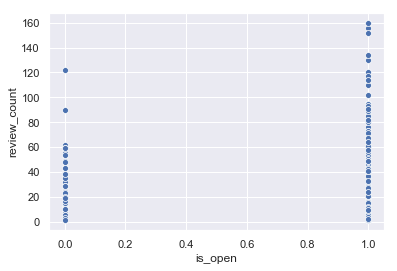

In [92]:
sns.set(style='darkgrid')
sns.scatterplot(y='review_count', x='is_open', data=ssdf)

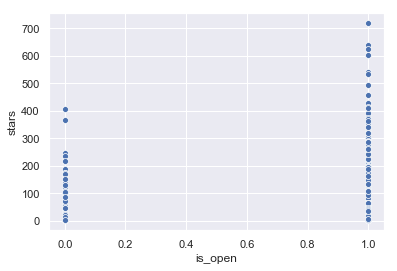

In [93]:
sns.set(style='darkgrid')
sns.scatterplot(y='stars', x='is_open', data=ssdf)

### 14. Use seaborn to create a boxplot to visualize the number of reviews a business
### had in its first 30 days.
### a. Separate the businesses by overall star rating.
### b. Distinguish between open and closed businesses by color.
### c. Experiment with axis scale or limits.
### 15. What a summary of what you observe from this of what you observe from this plot and draw everything
### together to make at least one proposal for a “value add” offering that could be
### sold to businesses.

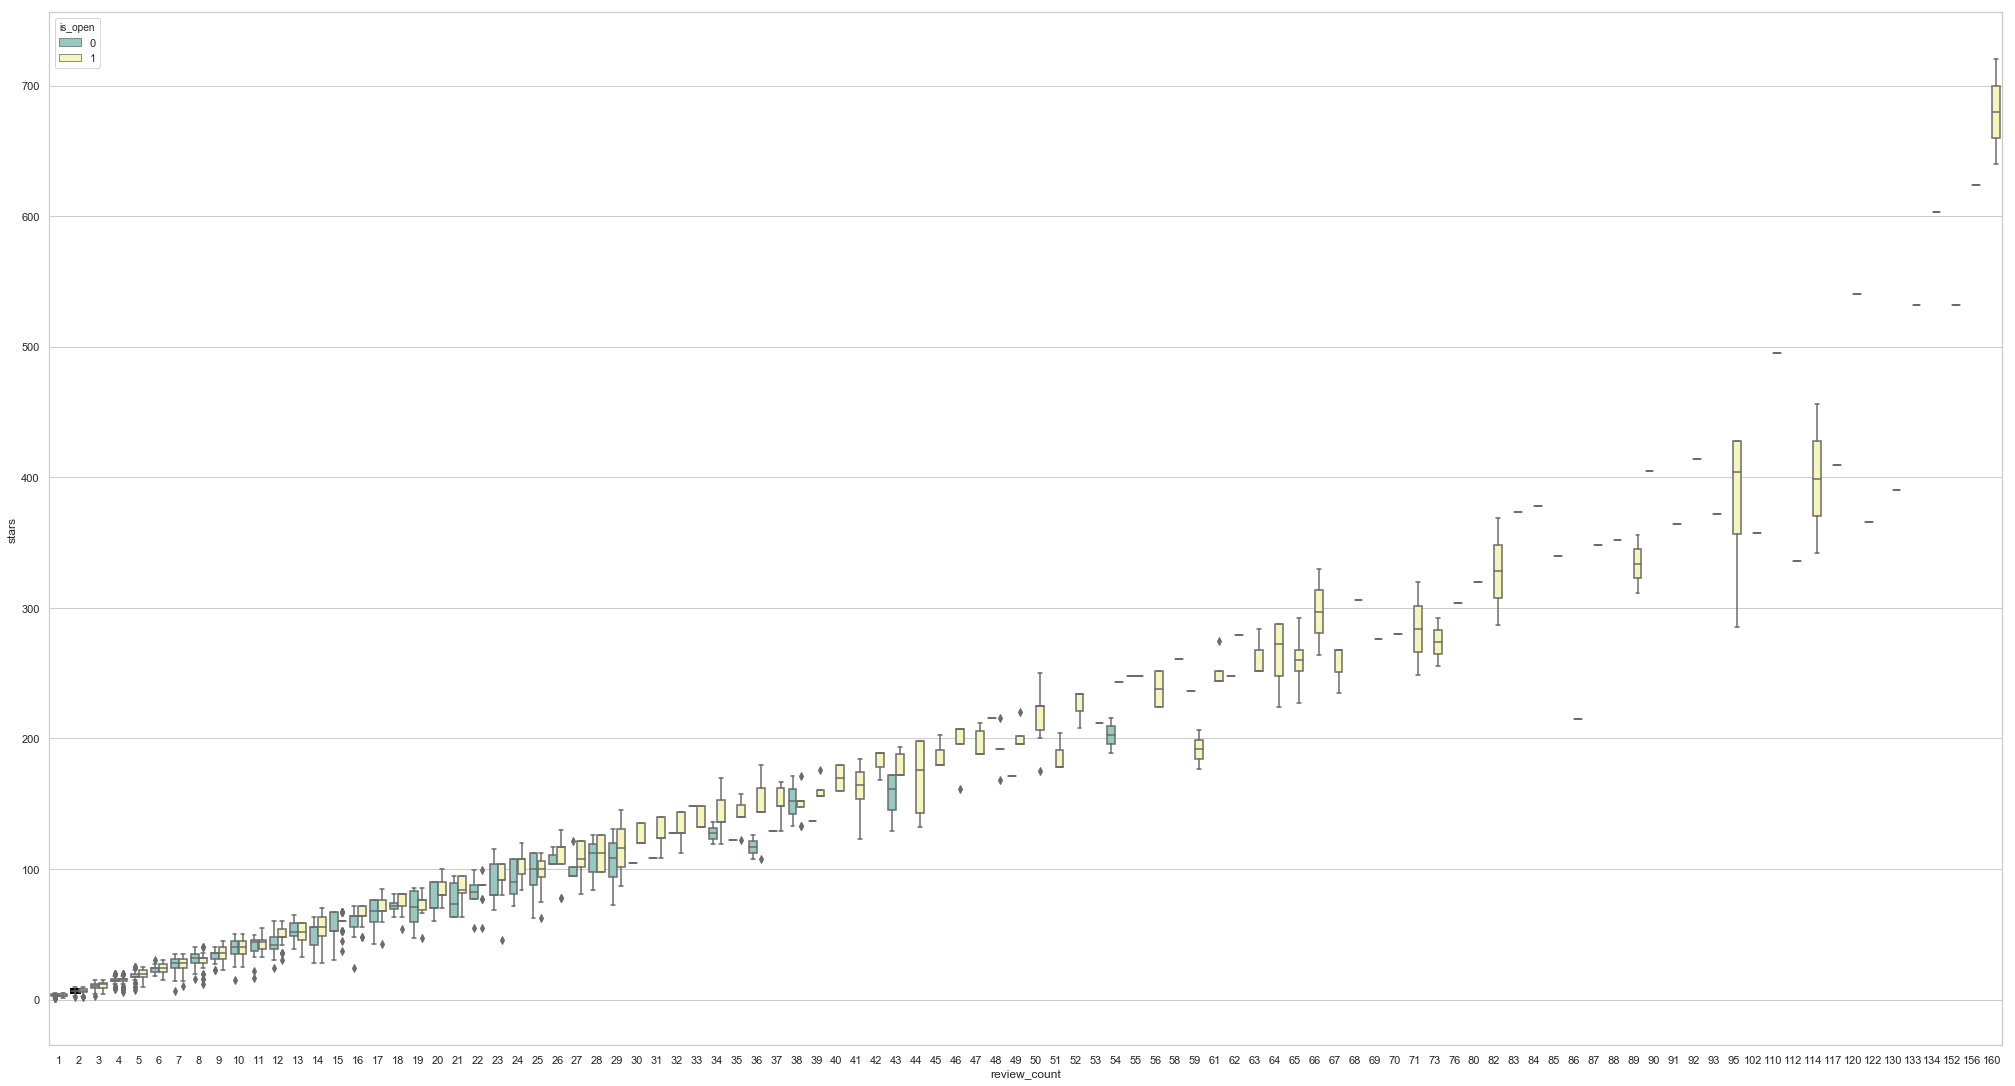

In [115]:
#tips = sns.load_dataset("tips")
#ax = sns.regplot(x="cum_stars",y="review_count",  data=ssdf,
                # scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig=plt.figure(figsize=(35,19))
sns.set_style("whitegrid")

ax= sns.boxplot(x="review_count", y="stars", hue="is_open", data=ssdf,palette="Set3")
mybox = ax.artists[2]

# Change the appearance of that box
mybox.set_facecolor('red')
mybox.set_edgecolor('black')
mybox.set_linewidth(3)
plt.show()

##### As we can see above that if a business keeps its services/products such that in the first 30 days of opening it gets lots & lots of good reviews with good ratings then there are more chances that it remains open